In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cross_decomposition import PLSRegression
import ECoG

In [2]:
x,y = ECoG.read_ECoG_from_csv("ECoG.csv","Motion.csv")

In [3]:
data = ECoG.ECoG(x,y,downsample = True)
filtered = data.bandpass_filter(lowcut=0.2,highcut=60,fs = 100,inplace=True) 

In [5]:
#works for a long time, needs about 1 hour to preprocess 15 min experiment
freq = np.array([i for i in range(10,150,15)]) 
scalo, motion,time = data.scalo(1,freq,start = 0,end = 3000) # preprocess first 3000(30 sec) objects of data

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\wavelets.py:364: ComplexWarning: Casting complex values to real discards the imaginary part
  mode='same')


In [6]:
X = scalo.reshape((scalo.shape[0],scalo.shape[1]*scalo.shape[2]*scalo.shape[3]))

In [7]:
model = PLSRegression(n_components = 50)
model.fit(X,motion)
Y_pred = model.predict(X)


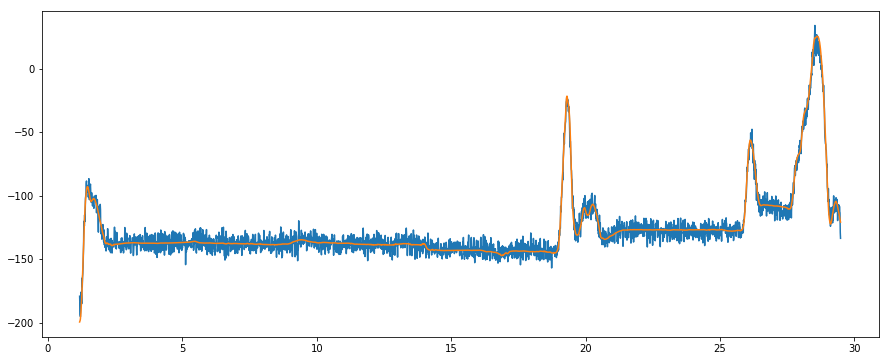

In [8]:
plt.figure(figsize = (15,6))
plt.plot(time,Y_pred[:,0])
plt.plot(time,motion[:,0])